In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Loan_Modelling.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIPCode               5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df["CD_Account"] = df["CD_Account"].astype("category")

In [8]:
def per_on_bar(plot,feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

## Observations on CD Account

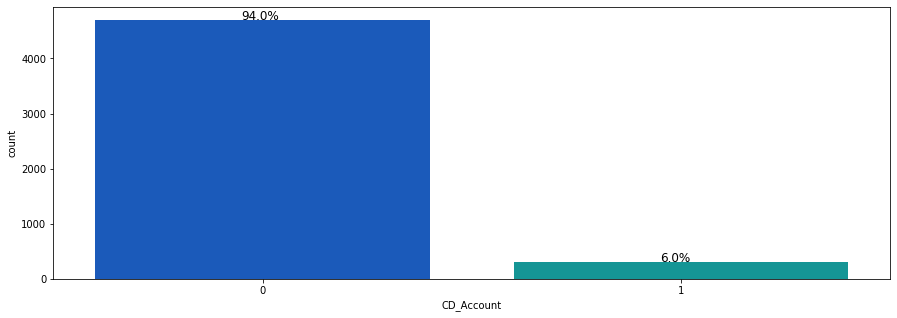

In [17]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="CD_Account",palette = 'winter')
per_on_bar(ax,df["CD_Account"])

**94%** of the customer don't have certificate for of deposit (CD) 

## Observations on Education

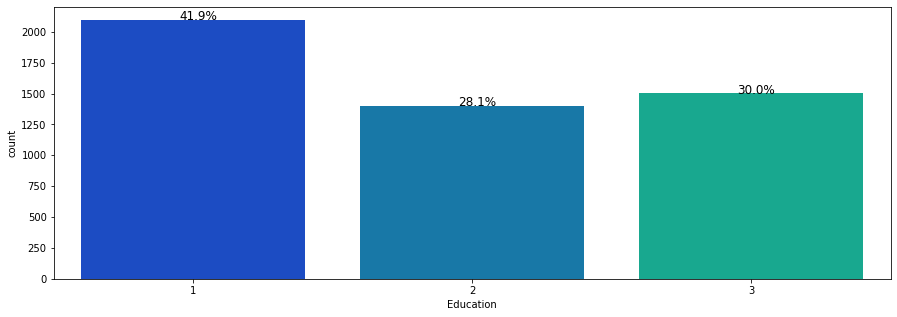

In [18]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="Education",palette = 'winter')
per_on_bar(ax,df["Education"])

**41%** of the customers are undergrad

## Observations on Family 

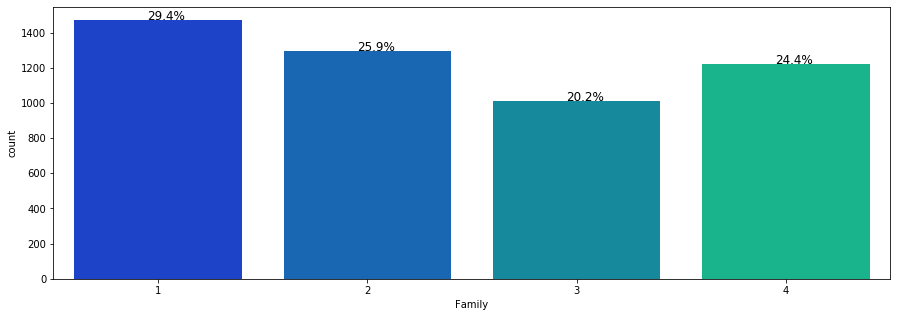

In [19]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="Family",palette = 'winter')
per_on_bar(ax,df["Family"])

**29.4%** of the customer have family size =1 

## Observation for Securities Account

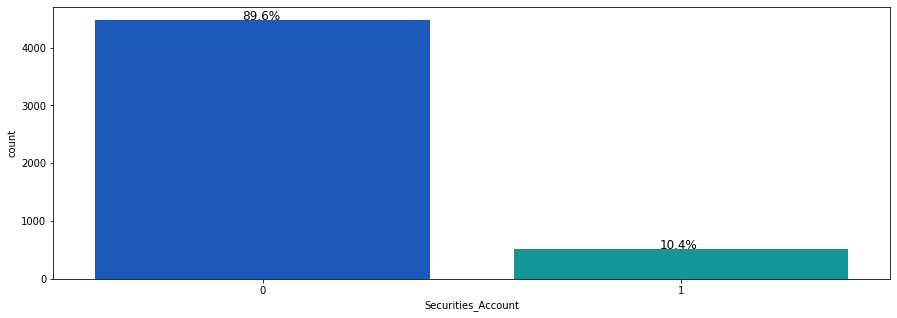

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="Securities_Account",palette = 'winter')
per_on_bar(ax,df["Securities_Account"])

Only **10.4%** Customer have Securities_Account with Bank

## Observation for Banking 

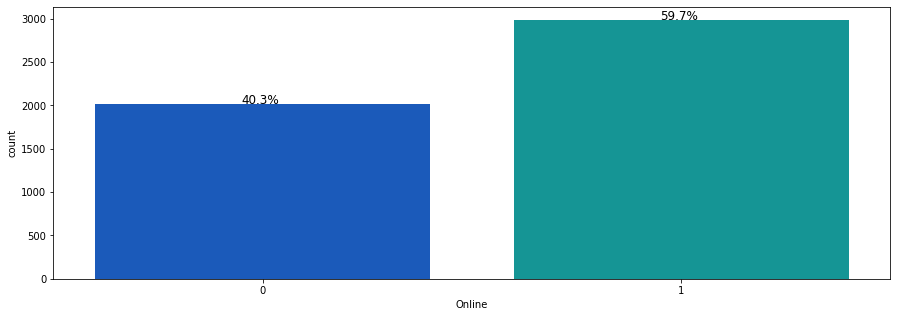

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="Online",palette = 'winter')
per_on_bar(ax,df["Online"])

**59.7%** of the customer use Online Banking Facility

## Observation for Credit Card

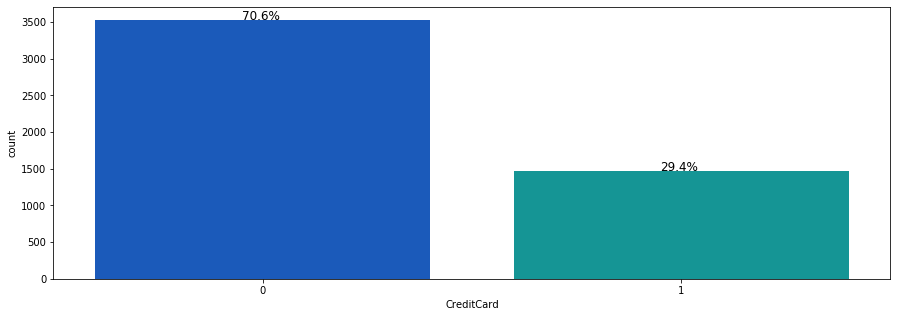

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="CreditCard",palette = 'winter')
per_on_bar(ax,df["CreditCard"])

Only **29.4%** customers have CreditCards

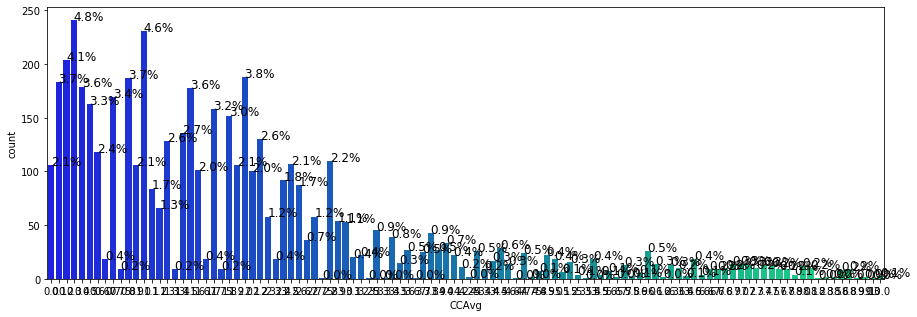

In [24]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="CCAvg",palette = 'winter')
per_on_bar(ax,df["CCAvg"])

In [25]:
df['Age'].max()

67

In [26]:
df['Age'].min()

23

In [28]:
df['Age'] = pd.cut(df['Age'],bins=[23,37,51,67])

In [29]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,"(23, 37]",1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,"(37, 51]",19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,"(37, 51]",15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,"(23, 37]",9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,"(23, 37]",8,45,91330,4,1.0,2,0,0,0,0,0,1


# Observation for Age Group

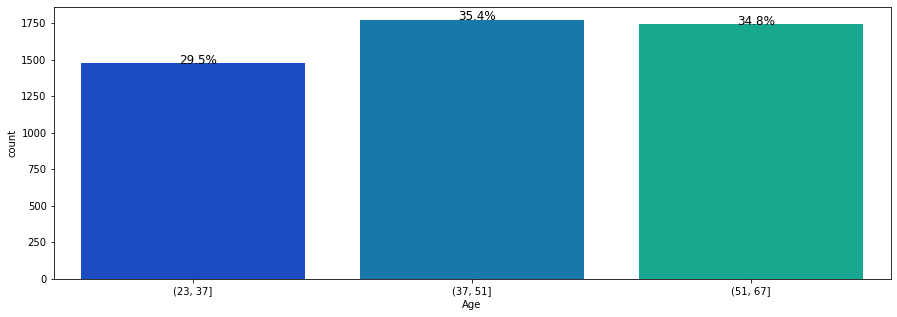

In [30]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="Age",palette = 'winter')
per_on_bar(ax,df["Age"])

Most of the customers are from Age Group from **37 to 51**

In [31]:
df['Experience'].max()

43

In [38]:
sum(df['Experience'] == -3)

4

In [39]:
sum(df['Experience'] == -2)

15

In [40]:
sum(df['Experience']== -1)

33

We have total 52 Outlier in our dataset 

In [44]:
i = df[((df.Experience == -1)& (df.Experience == -2) & (df.Experience == -3))].index

In [45]:
df.drop(i)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,"(23, 37]",1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,"(37, 51]",19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,"(37, 51]",15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,"(23, 37]",9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,"(23, 37]",8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,"(23, 37]",13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,"(51, 67]",27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,"(37, 51]",24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,"(23, 37]",10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,"(23, 37]",9,180,93023,1,8.90,3,0,1,0,0,0,0


In [49]:
df['Experience'].max()

43

In [52]:
df['Experience'] = pd.cut(df['Experience'],bins=[1,11,22,33,43])

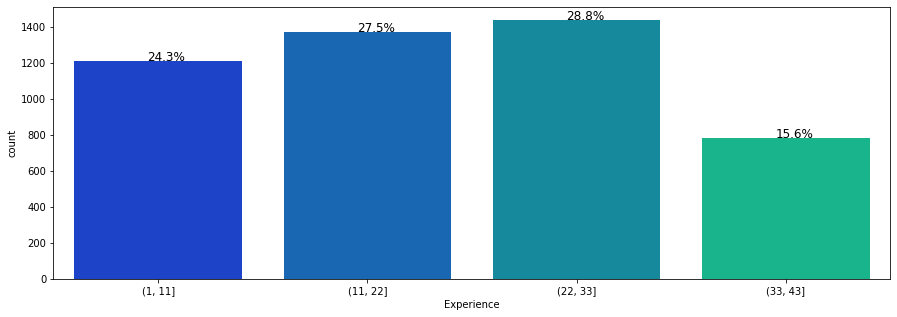

In [53]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="Experience",palette = 'winter')
per_on_bar(ax,df["Experience"])

Most of the customers are from Experince from **11 to 22 and 22 to 33**

In [54]:
df['Income'].min()

8

In [56]:
df['Income'].max()

224

In [57]:
df['Income'] = pd.cut(df['Income'],bins=[8,33,58,83,108,133,158,183,204])

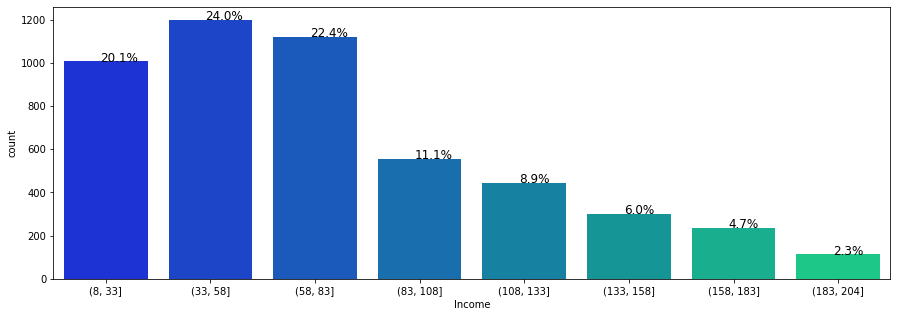

In [58]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="Income",palette = 'winter')
per_on_bar(ax,df["Income"])

People from Income between **8 to 33Dollars and  33  to 58Dollars and 58 to 83Dollars** are top 3 group of customers 

In [59]:
df['CCAvg'].min()

0.0

In [60]:
df['CCAvg'].max()

10.0

In [73]:
#df['CCAvg'] = pd.cut(df['CCAvg'],bins=[0.0,2.0,4.0,6.0,8.0,10.0])

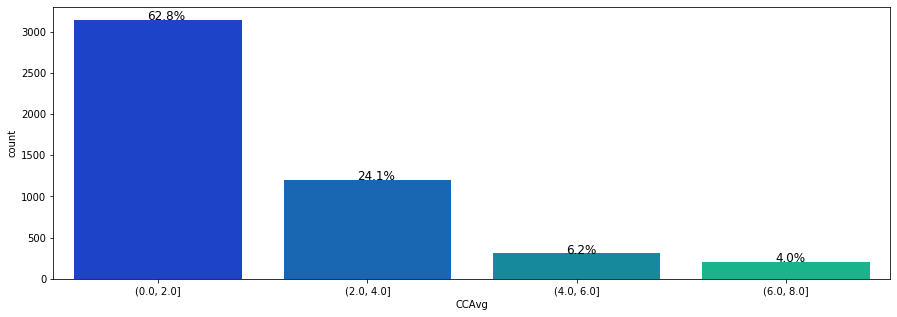

In [71]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data =df,x="CCAvg",palette = 'winter')
per_on_bar(ax,df["CCAvg"])

**62.8%** is the percentage of people who spend 0.0 to 2.0 monthly

# Bivariate Analysis

In [74]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


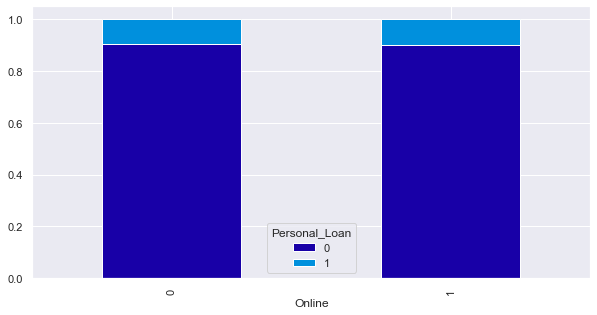

In [75]:
stacked_plot(df['Online'])

This Graph doesn't give any useful information

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


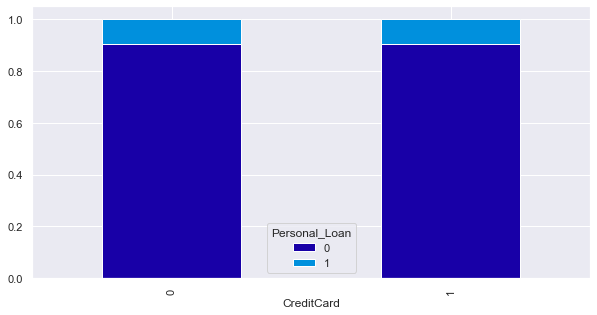

In [78]:
stacked_plot(df['CreditCard'])

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


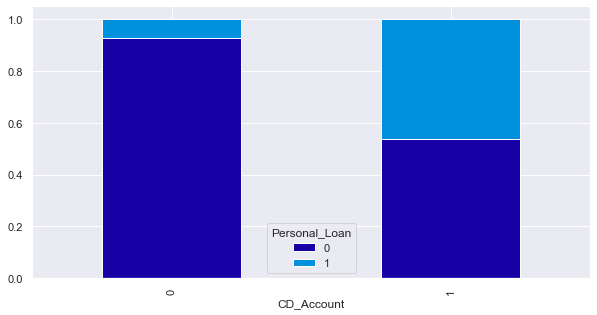

In [79]:
stacked_plot(df['CD_Account'])

Customer who have certificate of Deposit have taken loan 

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


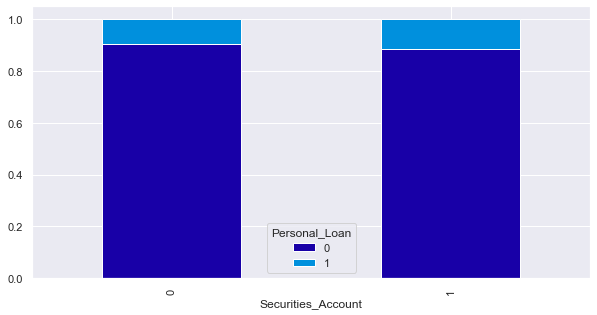

In [80]:
stacked_plot(df['Securities_Account'])

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


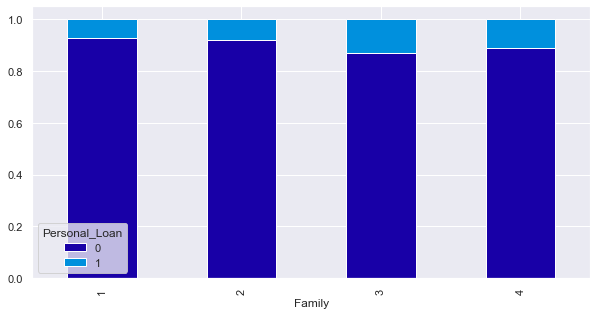

In [82]:
stacked_plot(df['Family'])

People having 4 family members have taken loan more as compare to other groups

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


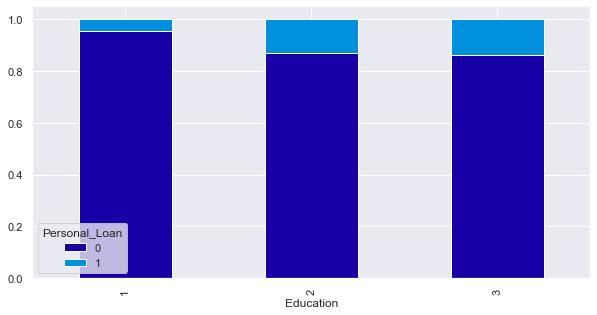

In [89]:
stacked_plot(df['Education'])

Advanced and Professional have applied for Loan mostly

#### Let's use family group and Certificate of Deposit for Chi-Square test

In [85]:
def stacked_plot_(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Family'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Family'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

Family         1     2     3     4   All
CD_Account                              
0           1389  1229   928  1152  4698
1             83    67    82    70   302
All         1472  1296  1010  1222  5000
------------------------------------------------------------------------------------------------------------------------


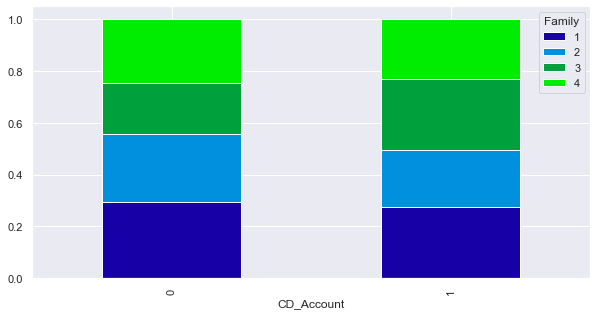

In [87]:
stacked_plot_(df['CD_Account'])

Family         1     2     3     4   All
CreditCard                              
0           1062   893   719   856  3530
1            410   403   291   366  1470
All         1472  1296  1010  1222  5000
------------------------------------------------------------------------------------------------------------------------


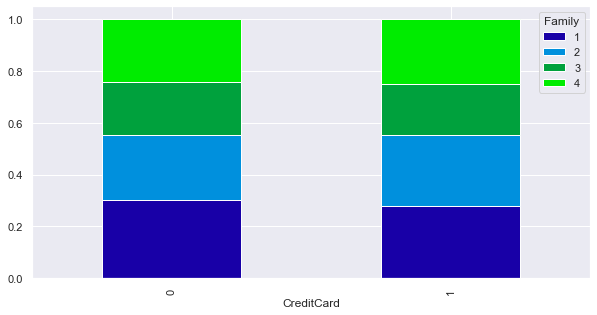

In [88]:
stacked_plot_(df['CreditCard'])

Family        1     2     3     4   All
Education                              
1           678   657   349   412  2096
2           326   265   383   429  1403
3           468   374   278   381  1501
All        1472  1296  1010  1222  5000
------------------------------------------------------------------------------------------------------------------------


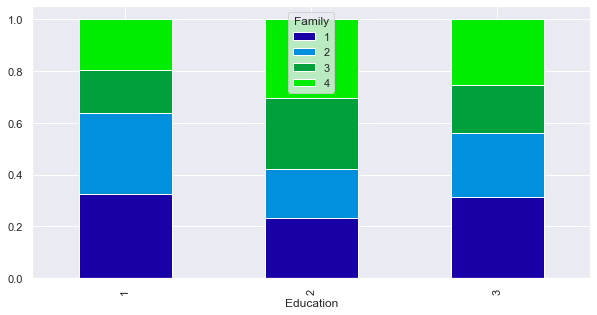

In [90]:
stacked_plot_(df['Education'])

# Split Data

In [91]:
x = df.drop(['Personal_Loan'],axis =1)
y = df['Personal_Loan']

In [92]:
x.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1,"(23, 37]",NaN,"(33, 58]",91107,4,"(0.0, 2.0]",1,0,1,0,0,0
1,2,"(37, 51]","(11.0, 22.0]","(33, 58]",90089,3,"(0.0, 2.0]",1,0,1,0,0,0
2,3,"(37, 51]","(11.0, 22.0]","(8, 33]",94720,1,"(0.0, 2.0]",1,0,0,0,0,0
3,4,"(23, 37]","(1.0, 11.0]","(83, 108]",94112,1,"(2.0, 4.0]",2,0,0,0,0,0
4,5,"(23, 37]","(1.0, 11.0]","(33, 58]",91330,4,"(0.0, 2.0]",2,0,0,0,0,1


In [93]:
x = pd.get_dummies(x,drop_first=True)
x.head()

,ID,ZIPCode,Family,Education,Mortgage,Securities_Account,Online,CreditCard,"Age_(37, 51]","Age_(51, 67]",...,"Income_(58, 83]","Income_(83, 108]","Income_(108, 133]","Income_(133, 158]","Income_(158, 183]","Income_(183, 204]","CCAvg_(2.0, 4.0]","CCAvg_(4.0, 6.0]","CCAvg_(6.0, 8.0]",CD_Account_1
0,1,91107,4,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,90089,3,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,94720,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,94112,1,2,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,5,91330,4,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
x = df.drop(['ZIPCode'],axis =1)

In [96]:
x.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,"(23, 37]",NaN,"(33, 58]",4,"(0.0, 2.0]",1,0,0,1,0,0,0
1,2,"(37, 51]","(11.0, 22.0]","(33, 58]",3,"(0.0, 2.0]",1,0,0,1,0,0,0
2,3,"(37, 51]","(11.0, 22.0]","(8, 33]",1,"(0.0, 2.0]",1,0,0,0,0,0,0
3,4,"(23, 37]","(1.0, 11.0]","(83, 108]",1,"(2.0, 4.0]",2,0,0,0,0,0,0
4,5,"(23, 37]","(1.0, 11.0]","(33, 58]",4,"(0.0, 2.0]",2,0,0,0,0,0,1


In [97]:
x = pd.get_dummies(x,drop_first=True)
x.head()

,ID,Family,Education,Mortgage,Personal_Loan,Securities_Account,Online,CreditCard,"Age_(37, 51]","Age_(51, 67]",...,"Income_(58, 83]","Income_(83, 108]","Income_(108, 133]","Income_(133, 158]","Income_(158, 183]","Income_(183, 204]","CCAvg_(2.0, 4.0]","CCAvg_(4.0, 6.0]","CCAvg_(6.0, 8.0]",CD_Account_1
0,1,4,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,5,4,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4 , random_state=1)

In [100]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3000, 24)
(2000, 24)
(3000,)
(2000,)


# Build Logistic Regression Model

In [101]:
y.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
clf = LogisticRegression()

In [104]:
clf.fit(xtrain,ytrain)

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# Scoring our Model 

In [105]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree

In [106]:
print("Accuracy on train set", clf.score(xtrain,ytrain))

# accuracy on test set
print("Accuracy on test set", clf.score(xtest,ytest))

Accuracy on train set 1.0
Accuracy on test set 1.0


In [107]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = clf.predict(xtest)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

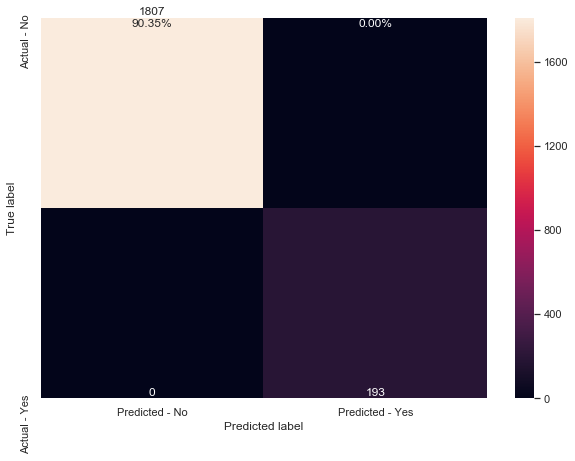

In [108]:
make_confusion_matrix(clf,ytest)

In [109]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = clf.predict(xtrain)
    pred_test = clf.predict(xtest)
    print("Recall on training set : ",metrics.recall_score(ytrain,pred_train))
    print("Recall on test set : ",metrics.recall_score(ytest,pred_test))

In [110]:
get_recall_score(clf)

Recall on training set :  1.0
Recall on test set :  1.0
